In [1]:
# Software Name : HSLinUCB
# SPDX-FileCopyrightText: Copyright (c) 2021 Orange
# SPDX-License-Identifier: GPL-2.0
#
# This software is distributed under the GNU General Public License v2.0 license
#
# Author: David DELANDE <david.delande@orange.com> et al.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
import seaborn as sns

## display graph hotstart seen contexts

HSlinucb experiments number: 10
Deep Q-Learning experiments number: 10
Q-Learning experiments number: 10
mean latency hslinucb: 280.5301915655555  +/- 1.8314657583784186
mean latency Deep Q-Learning: 266.1357659527777  +/- 1.5666957062332616
mean latency Q-Learning: 304.39239500499997  +/- 1.7383865328558417
mean hslinucb latency errors:  0.0  +/- 0.0
mean Deep Q-Learning latency errors:  0.1 +/- 0.18594192641790072
mean Q-Learning latency errors:  0.6 +/- 0.3036418943426615
mean container number hslinucb: 3.0205444444444445  +/- 0.02438388772561947
mean container number Deep Q-Learning: 3.1229666666666662  +/- 0.026509489460988713
mean container number Q-Learning: 2.9283555555555556  +/- 0.026537384955128914


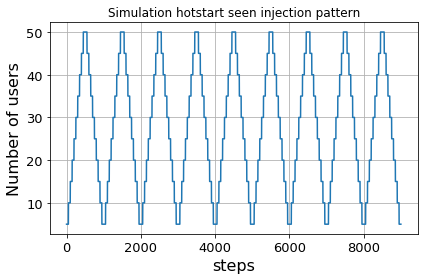

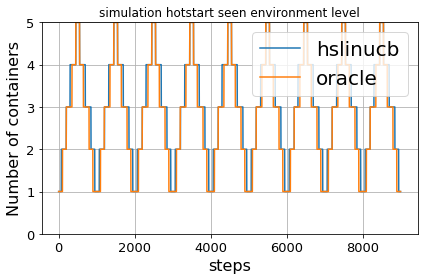

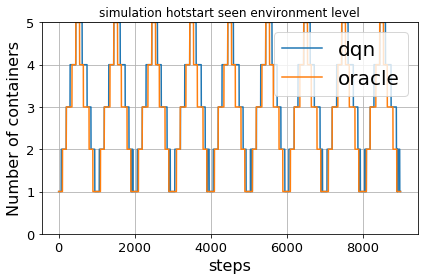

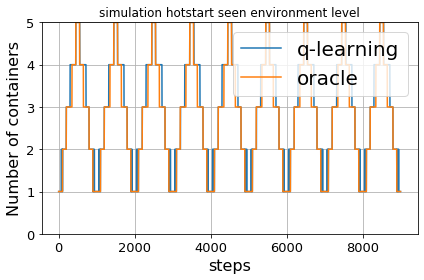

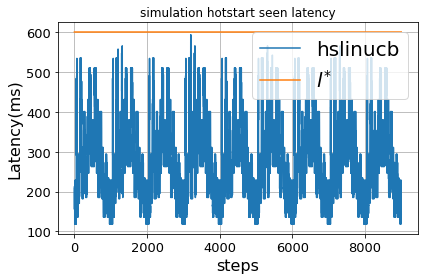

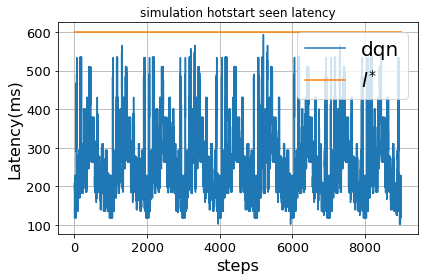

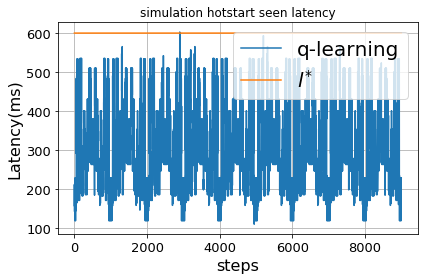

In [3]:
with open("hslinucb_injector_level_hotstart_seen.bin", 'rb') as f:
    injector_level = np.load(f)
with open("hslinucb_optimal_environment_level_hotstart_seen.bin", 'rb') as f:
    optimal_environment = np.load(f)
with open("hslinucb_latency_reference_hotstart_seen.bin", 'rb') as f:
    latency_reference = np.load(f)
with open("deepqlearning_environment_level_hotstart_seen.bin", 'rb') as f:
    environment_level_dqn = np.load(f)
with open("deepqlearning_latency_hotstart_seen.bin", 'rb') as f:
    latency_dqn = np.load(f)
with open("qlearning_environment_level_hotstart_seen.bin", 'rb') as f:
    environment_level_q = np.load(f)
with open("qlearning_latency_hotstart_seen.bin", 'rb') as f:
    latency_q = np.load(f)
with open("hslinucb_environment_level_hotstart_seen.bin", 'rb') as f:
    environment_level_hslinucb = np.load(f)
with open("hslinucb_latency_hotstart_seen.bin", 'rb') as f:
    latency_hslinucb = np.load(f)

latency_ref = 600
print("HSlinucb experiments number:", len(environment_level_hslinucb)) 
print("Deep Q-Learning experiments number:", len(environment_level_dqn))
print("Q-Learning experiments number:", len(environment_level_q))
mean_latency_hslinucb_on_exp = np.mean(latency_hslinucb, axis=0)
std_latency_hslinucb = np.std(mean_latency_hslinucb_on_exp, axis=0) / np.sqrt(len(mean_latency_hslinucb_on_exp))
print("mean latency hslinucb:", np.mean(mean_latency_hslinucb_on_exp), " +/-", 1.96 * std_latency_hslinucb)
mean_latency_dqn_on_exp = np.mean(latency_dqn, axis=0)
std_latency_dqn = np.std(mean_latency_dqn_on_exp, axis=0) / np.sqrt(len(mean_latency_dqn_on_exp))
print("mean latency Deep Q-Learning:", np.mean(mean_latency_dqn_on_exp), " +/-", 1.96 * std_latency_dqn)
mean_latency_q_on_exp = np.mean(latency_q, axis=0)
std_latency_q = np.std(mean_latency_q_on_exp, axis=0) / np.sqrt(len(mean_latency_q_on_exp))
print("mean latency Q-Learning:", np.mean(mean_latency_q_on_exp), " +/-", 1.96 * std_latency_q)
latency_errors_hslinucb = []
latency_errors_dqn = []
latency_errors_q = []
for i in range(len(latency_hslinucb)):
    latency_error = 0
    for k in range(len(latency_hslinucb[i])):
        if latency_hslinucb[i,k] > latency_ref:
            latency_error +=1
    latency_errors_hslinucb.append(latency_error)
for i in range(len(latency_dqn)):
    latency_error = 0
    for k in range(len(latency_dqn[i])):
        if latency_dqn[i,k] > latency_ref:
            latency_error +=1
    latency_errors_dqn.append(latency_error)
for i in range(len(latency_q)):
    latency_error = 0
    for k in range(len(latency_q[i])):
        if latency_q[i,k] > latency_ref:
            latency_error +=1
    latency_errors_q.append(latency_error)

std_latency_error_hslinucb = np.std(latency_errors_hslinucb, axis=0) / np.sqrt(len(latency_errors_hslinucb))
print("mean hslinucb latency errors: ", np.mean(latency_errors_hslinucb), " +/-", 1.96 * std_latency_error_hslinucb)
std_latency_error_dqn = np.std(latency_errors_dqn, axis=0) / np.sqrt(len(latency_errors_dqn))
print("mean Deep Q-Learning latency errors: ", np.mean(latency_errors_dqn),"+/-", 1.96 * std_latency_error_dqn)
std_latency_error_q = np.std(latency_errors_q, axis=0) / np.sqrt(len(latency_errors_q))
print("mean Q-Learning latency errors: ",np.mean(latency_errors_q),"+/-", 1.96 * std_latency_error_q)
mean_environment_level_hslinucb_on_exp = np.mean(environment_level_hslinucb, axis=0)
std_environment_level_hslinucb = np.std(mean_environment_level_hslinucb_on_exp, axis=0) / np.sqrt(len(mean_environment_level_hslinucb_on_exp))
print("mean container number hslinucb:", np.mean(mean_environment_level_hslinucb_on_exp), " +/-", 1.96 * std_environment_level_hslinucb)
mean_environment_level_dqn_on_exp = np.mean(environment_level_dqn, axis=0)
std_environment_level_dqn = np.std(mean_environment_level_dqn_on_exp, axis=0) / np.sqrt(len(mean_environment_level_dqn_on_exp))
print("mean container number Deep Q-Learning:", np.mean(mean_environment_level_dqn_on_exp), " +/-", 1.96 * std_environment_level_dqn)
mean_environment_level_q_on_exp = np.mean(environment_level_q, axis=0)
std_environment_level_q = np.std(mean_environment_level_q_on_exp, axis=0) / np.sqrt(len(mean_environment_level_q_on_exp))
print("mean container number Q-Learning:", np.mean(mean_environment_level_q_on_exp), " +/-", 1.96 * std_environment_level_q)

mean_optimal_environment_level = np.mean(optimal_environment, axis=0)

fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)
plt.xlabel('steps',fontsize=16)
plt.ylabel("Number of users",fontsize=16)
plt.xticks(fontsize=13,fontweight='normal')
plt.yticks(fontsize=13,fontweight='normal')
mean_injector_level = np.mean(injector_level, axis=0)
t = np.arange(len(mean_injector_level))
ax.plot(t,mean_injector_level)
ax.grid()
ax.set_title('Simulation hotstart seen injection pattern')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)
plt.xlabel('steps',fontsize=16)
plt.ylabel("Number of containers",fontsize=16)
plt.ylim(top=5)
plt.xticks(fontsize=13,fontweight='normal')
plt.yticks(fontsize=13,fontweight='normal')
t = np.arange(len(mean_injector_level))
ax.plot(t,environment_level_hslinucb[0],label="hslinucb")
ax.plot(t,mean_optimal_environment_level,label="oracle")
ax.grid()
ax.set_title('simulation hotstart seen environment level')
plt.tight_layout()
plt.legend(loc = 'upper right',prop={'size':20})
plt.show()

    
fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)
plt.xlabel('steps',fontsize=16)
plt.ylim(top=5)
plt.ylabel("Number of containers",fontsize=16)
plt.xticks(fontsize=13,fontweight='normal')
plt.yticks(fontsize=13,fontweight='normal')
t = np.arange(len(mean_injector_level))
ax.plot(t,environment_level_dqn[0],label="dqn")
ax.plot(t,mean_optimal_environment_level,label="oracle")
ax.grid()
ax.set_title('simulation hotstart seen environment level')
plt.tight_layout()
plt.legend(loc = 'upper right',prop={'size':20})
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)
plt.xlabel('steps',fontsize=16)
plt.ylim(top=5)
plt.ylabel("Number of containers",fontsize=16)
plt.xticks(fontsize=13,fontweight='normal')
plt.yticks(fontsize=13,fontweight='normal')
t = np.arange(len(mean_injector_level))
ax.plot(t,environment_level_q[0],label="q-learning")
ax.plot(t,mean_optimal_environment_level,label="oracle")
ax.grid()
ax.set_title('simulation hotstart seen environment level')
plt.tight_layout()
plt.legend(loc = 'upper right',prop={'size':20})
plt.show()


fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)
plt.xlabel('steps',fontsize=16)
plt.ylabel("Latency(ms)",fontsize=16)
plt.xticks(fontsize=13,fontweight='normal')
plt.yticks(fontsize=13,fontweight='normal')
t = np.arange(len(mean_injector_level))
latency_reference = np.mean(latency_reference, axis=0)
ax.plot(t,latency_hslinucb[0],label="hslinucb")
ax.plot(t,latency_reference,label=r'$l^{*}$')
ax.grid()
ax.set_title('simulation hotstart seen latency')
plt.tight_layout()
plt.legend(loc = 'upper right',prop={'size':20})
plt.show()

    
fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)
plt.xlabel('steps',fontsize=16)
plt.ylabel("Latency(ms)",fontsize=16)
plt.xticks(fontsize=13,fontweight='normal')
plt.yticks(fontsize=13,fontweight='normal')
t = np.arange(len(mean_injector_level))
ax.plot(t,latency_dqn[0],label="dqn")
ax.plot(t,latency_reference,label=r'$l^{*}$')
ax.grid()
ax.set_title('simulation hotstart seen latency')
plt.tight_layout()
plt.legend(loc = 'upper right',prop={'size':20})
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)
plt.xlabel('steps',fontsize=16)
plt.ylabel("Latency(ms)",fontsize=16)
plt.xticks(fontsize=13,fontweight='normal')
plt.yticks(fontsize=13,fontweight='normal')
t = np.arange(len(mean_injector_level))
ax.plot(t,latency_q[0],label="q-learning")
ax.plot(t,latency_reference,label=r'$l^{*}$')
ax.grid()
ax.set_title('simulation hotstart seen latency')
plt.tight_layout()
plt.legend(loc = 'upper right',prop={'size':20})
plt.show()

